In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import json
import random
from dateutil.parser import parse

In [2]:
%matplotlib inline

In [3]:
def get_key_from_value(my_dict, value):
    for k, v in my_dict.iteritems():
        if v == value:
            return k, v

In [4]:
def get_N_random(data, n):
    return random.sample(data, n)

In [20]:
def pdf_from_list(data, normalize=True):
    """
    Returns a pdf (probability density function) from a list of numeric values.

    Parameters
    ----------
    data: list
        List of numeric values

    Returns
    -------
    list
        List of tuples, representing the value and its corresponding probability

    Examples
    --------
    >>> pdf_from_list([1, 4, 1, 5])
        [(1, 0.5), (4, 0.25), (5, 0.25)]
    """
    data_size = len(data)
    pdf = {}
    for x in data:
        # counting value occurrence
        if x not in pdf:
            pdf[x] = 0
        pdf[x] += 1
    # list of unique values in data
    values_list = pdf.keys()
    output = []
    for x in values_list:
        # adding tuple with value and its corresponding probability
        if normalize:
            output.append((x, (1.*pdf[x])/data_size))
        else:
            output.append((x, pdf[x]))
    return output

In [21]:
def ccdf_from_pdf(pdf, percent_check=1.0):
    """
    Converts the pdf in a ccdf
    :param pdf_dict: pdf structured as {1:10}, i.e. 1 happens 10 times
    :returns: ccdf as {1:1.0}, i.e. 100% are greater or equal to 1
    """
    pdf_dict = {}
    for x, y in pdf:
        pdf_dict[x] = y
    hist = {}
    set_size = sum(pdf_dict.values())
    x_values = map(float, pdf_dict.keys())
    x_values.sort()
    #By definition, first selement will always be (x, 1.0)
    hist[x_values[0]] = 1.0
    #Considering mass of first element
    counted_data = pdf_dict[x_values[0]]
    for x in x_values[1:]:
        hist[x] = float(set_size-counted_data)/set_size
        counted_data += pdf_dict[x]
    return hist

In [5]:
aps_works = json.load(open("aps_works.json"))
aps_works_map = json.load(open("aps_works_map.json"))
aps_authors_map = json.load(open("aps_authors_map.json"))
AUTHORS = 0
CITED = 1

## Author with more than 900 articles

In [6]:
authors_works_counter = [0]*394801
for work_date, work_info in aps_works:
    work_date = parse(work_date)
    work_authors = work_info[AUTHORS]
    for author in work_authors:
        authors_works_counter[author] += 1

In [7]:
for author, works_count in enumerate(authors_works_counter):
    if works_count > 900:
        print "Author, ID, # works"
        print get_key_from_value(aps_authors_map, author), works_count

Author, ID, # works
(u'M. S. Alam', 252204) 942
Author, ID, # works
(u'D. N. Brown', 257429) 951


## 10 random works of each author

In [8]:
brown_works = []
alam_works = []
for work_id, (work_date, work_info) in enumerate(aps_works):
    work_date = parse(work_date)
    work_authors = work_info[AUTHORS]
    for author in work_authors:
        if author == 252204:
            alam_works.append(work_id)
        if author == 257429:
            brown_works.append(work_id)

### M. S. Alam

In [9]:
for work_id in get_N_random(alam_works, 10):
    print get_key_from_value(aps_works_map, work_id)

(u'10.1103/PhysRevD.69.052005', 357100)
(u'10.1103/PhysRevD.53.6033', 244753)
(u'10.1103/PhysRevD.65.031102', 322633)
(u'10.1103/PhysRevD.58.052002', 272895)
(u'10.1103/PhysRevD.74.011106', 398457)
(u'10.1103/PhysRevD.80.092003', 459601)
(u'10.1103/PhysRevD.74.031105', 399486)
(u'10.1103/PhysRevD.31.2161', 134667)
(u'10.1103/PhysRevD.83.112006', 489576)
(u'10.1103/PhysRevLett.56.2676', 142654)


### D. N. Brown

In [10]:
for work_id in get_N_random(brown_works, 10):
    print get_key_from_value(aps_works_map, work_id)

(u'10.1103/PhysRevD.74.091101', 403320)
(u'10.1103/PhysRevLett.95.041805', 379765)
(u'10.1103/PhysRevD.83.051101', 484190)
(u'10.1103/PhysRevLett.103.041802', 453965)
(u'10.1103/PhysRevD.73.031101', 390665)
(u'10.1103/PhysRevLett.95.121802', 382701)
(u'10.1103/PhysRevD.77.011104', 424557)
(u'10.1103/PhysRevLett.97.112002', 400925)
(u'10.1103/PhysRevLett.96.011803', 388600)
(u'10.1103/PhysRevD.83.112010', 490400)


## Colaborations, Authors and Citations

In [11]:
all_authors = {}
all_citations = {}
colaborations_year = [0]*121
authors_year = [0]*121
citations_year = [0]*121

for work_date, work_info in aps_works:
    t = parse(work_date).year-1893
    colaborations_year[t] += 1
    work_authors = work_info[AUTHORS]
    for author in work_authors:
        if author not in all_authors:
            all_authors[author] = 0
            authors_year[t]+=1
        all_authors[author] += 1
    cited_works = work_info[CITED]
    for cited in cited_works:
        if cited not in all_citations:
            all_citations[cited] = 0
            citations_year[t] += 1
        all_citations[cited] += 1

In [12]:
def sum_over_year(data):
    data2 = data
    for t in xrange(len(data)-1):
        data2[t+1] = data2[t+1] + data2[t]
    return data2

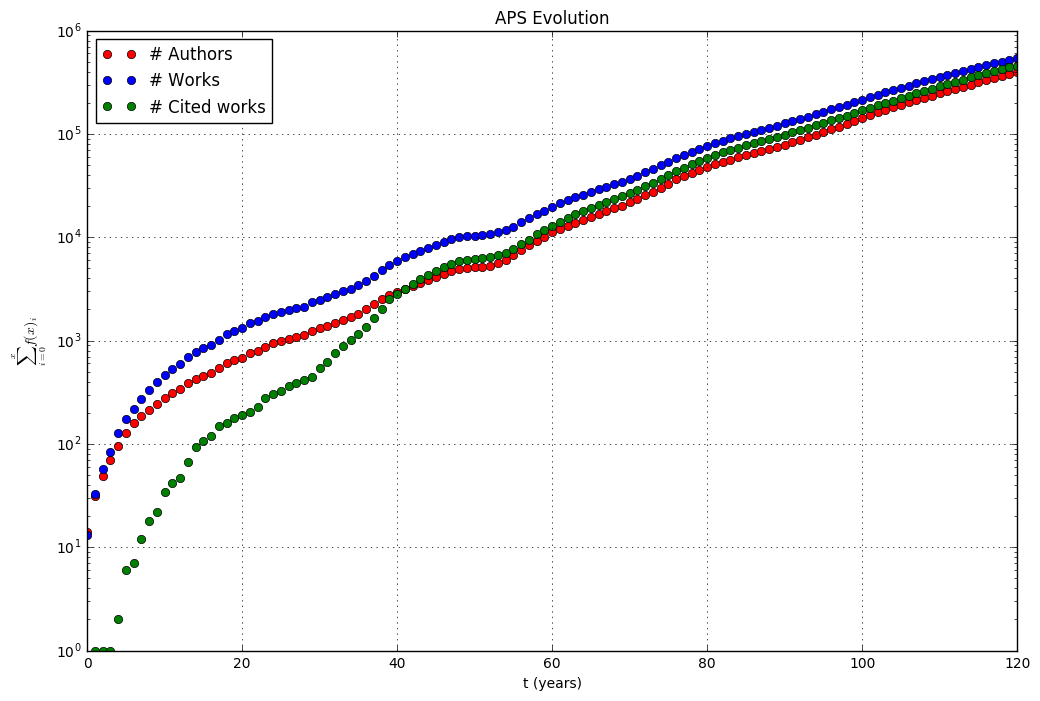

In [13]:
plt.figure(figsize=(12,8))
plt.plot(sum_over_year(authors_year),'ro') # plotting t,a separately 
plt.plot(sum_over_year(colaborations_year),'bo') # plotting t,b separately 
plt.plot(sum_over_year(citations_year),'go') # plotting t,c separately 
plt.yscale("log")
plt.legend(["# Authors", "# Works", "# Cited works"], loc='upper left')
plt.title("APS Evolution")
plt.xlabel("t (years)")
plt.ylabel(r'$\sum_{i=0}^x f(x)_i$')
#plt.xlim([1893, 2013])
plt.grid(True)
plt.savefig("aps_evolution_linear.png")
plt.savefig("aps_evolution_linear.eps")
plt.show()

## Works with more than 1000 authors

In [14]:
works_author_counter = {}
for work_id, (work_date, work_info) in enumerate(aps_works):
    works_author_counter[work_id] = len(work_info[AUTHORS])

In [15]:
over_1000_authors_list = []
for work_id, authors_count in works_author_counter.iteritems():
    if authors_count > 1000:
        over_1000_authors_list.append(work_id)

In [16]:
len(over_1000_authors_list)

157

## 10 random works with more than 1000 authors

In [17]:
for work_id in get_N_random(over_1000_authors_list, 10):
    print get_key_from_value(aps_works_map, work_id)

(u'10.1103/PhysRevLett.105.252303', 480670)
(u'10.1103/PhysRevLett.108.241802', 510306)
(u'10.1103/PhysRevLett.108.152001', 506429)
(u'10.1103/PhysRevD.87.092008', 528743)
(u'10.1103/PhysRevD.87.012006', 521641)
(u'10.1103/PhysRevD.87.052017', 525814)
(u'10.1103/PhysRevD.83.112001', 488808)
(u'10.1103/PhysRevLett.110.042301', 522277)
(u'10.1103/PhysRevD.86.014022', 512524)
(u'10.1103/PhysRevLett.110.011802', 521435)


## Vertices active time in the network

In [18]:
authors_pub_net = {}
for work_date, work_info in aps_works:
    work_date = parse(work_date)
    work_authors = work_info[AUTHORS]
    for author in work_authors:
        if author not in authors_pub_net:
            authors_pub_net[author] = {"first_year": work_date.year}
        authors_pub_net[author]["last_year"] = work_date.year

In [19]:
authors_active_time = []
for author, date_range in authors_pub_net.iteritems():
    authors_active_time.append(date_range["last_year"] - date_range["first_year"])

In [22]:
authors_active_time_pdf = pdf_from_list(authors_active_time)
ccdf = ccdf_from_pdf(authors_active_time_pdf)
x_ccdf = ccdf.keys()
y_ccdf = ccdf.values()

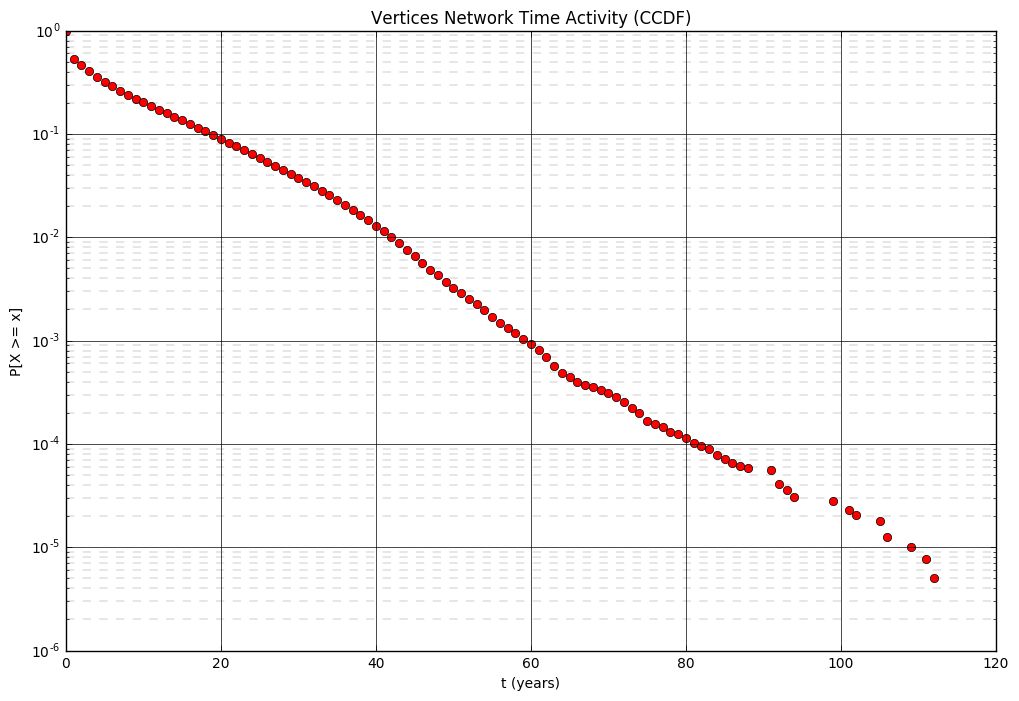

In [23]:
plt.figure(figsize=(12,8))
plt.plot(x_ccdf, y_ccdf, 'ro')
plt.yscale("log")
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linewidth=.2, alpha=.7, linestyle='--')
#plt.legend(graphs_names_list, loc='upper right')
plt.title("Vertices Network Time Activity (CCDF)")
plt.xlabel("t (years)")
plt.ylabel("P[X >= x]")
plt.savefig("ccdf_time_activity.png")
plt.show()

## Authors older than 90 years old ?!

In [24]:
print "Author Name, Id, Active_time, Published works"
for author, date_range in authors_pub_net.iteritems():
    active_time = date_range["last_year"] - date_range["first_year"]
    if active_time > 90:
        print get_key_from_value(aps_authors_map, author), active_time, authors_works_counter[author]

Author Name, Id, Active_time, Published works
(u'R. L. Jones', 13) 91 10
(u'S. J. Allen', 20) 106 26
(u'S. R. Williams', 41) 99 22
(u'J. H. Smith', 3595) 93 26
(u'J. A. Becker', 9297) 93 185
(u'P. J. Nolan', 19462) 92 76
(u'F. J. Rogers', 20491) 109 29
(u'T. S. Taylor', 21453) 91 16
(u'M. Scott', 21461) 91 14
(u'J. A. Fleming', 21485) 91 13
(u'J. A. Gray', 21487) 91 82
(u'C. E. Lane', 21496) 91 18
(u'F. C. Brown', 21513) 101 36
(u'S. L. Brown', 21945) 99 6
(u'C. M. Smith', 23837) 94 2
(u'L. A. Jones', 23852) 102 13
(u'K. Ogura', 49501) 105 17
(u'R. Rankin', 54463) 92 6
(u'K. Honda', 58541) 112 21
(u'S. Shimizu', 65470) 112 101
(u'S. Sano', 235382) 111 49
(u'K. Tsuruta', 337405) 105 3


In [25]:
np.mean(authors_active_time)

5.5006750236194941

In [26]:
np.std(authors_active_time)

9.3258067467537735

In [27]:
np.median(authors_active_time)

1.0